Mariel Vicente

D214: MSDA Capstone

<center> 

## Using Random Forest to Detect Panic Disorder Diagnoses

</center>


### A. Research Question
The research question for this capstone study is, “Can the random forest approach be used to predict whether a person has a panic disorder diagnosis?" 

In the post-pandemic world, mental health diagnosis and treatment has become more necessary than ever due to heightened stress and anxiety brought on by major societal changes. Studies have shown that the prevalence of anxiety-related disorders increased during and after the pandemic (Georgieva et al., 2021). Panic disorder in particular is defined by “recurring and unexpected panic attacks, accompanied by anticipatory anxiety about future attacks and their consequences” (Oussi et al., 2023). It can be a debilitating disorder that affects all aspects of one’s life. A previous study found that the random forest algorithm outperformed other machine learning techniques when predicting generalized anxiety disorder among women (Jothi et al., 2018). Building a random forest model to predict panic disorder diagnoses could allow mental health providers to detect the disorder earlier than traditional methods, which could lead to patients receiving much needed and appropriate treatment sooner.

The null hypothesis of the study is H0: A random forest model predicting panic disorder with a mean squared error (MSE) of 0.25 or lower cannot be achieved using the panic disorder data set. The alternate hypothesis of the study is H1: A random forest model predicting panic disorder with a mean squared error (MSE) of 0.25 or lower can be achieved using the panic disorder data set. The MSE metric sets a threshold for model accuracy to ensure that the model is fit for real life application.

### B. Data Collection
To answer the research question, I obtained a publicly available data set that included patient data related to panic disorder factors and symptoms. The data set was obtained from Kaggle.com at the following link: https://www.kaggle.com/datasets/muhammadshahidazeem/panic-disorder-detection-dataset/data. The data set is owned and authored by Muhammad Shahid Azeem and was collected at Ayesha Clinic. It is updated on a quarterly basis. The data set has been split into training and testing sets with a combined total of 120,000 rows and 17 columns.

One advantage of the data-gathering methodology used is that the data was publicly available and licensed as Good Laboratory Practice 2 (GLP-2), which ensures the quality and intregrity of the data set for this analysis (U.S. FDA, 2015). One disadvantage is that the data set is relatively large, which caused the model to run slower. To address the slowness, I utilized the RandomSearchCV function over the GridSearchCV function to sample a fixed set of random combinations rather than a full exhaustive search. I also utilized a smaller grid with fewer hyperparameter options when setting my parameter grid for my model.

### C. Data Extraction and Preparation

The first step was to import all the necessary packages for data manipulation, visualization, machine learning, and evaluation metrics. I loaded both available data sets (training & testing) and concatenated them for data preparation. Next I explored the data by viewing the shape, summary, head, and descriptive statistics of the data set. Before data cleaning, there was 120,000 rows and 17 columns. I calculated the data sparsity percentage of the data set which was found to be 5.6%.

In [1]:
#Import necessary packages
import numpy as np #linear algebra
import pandas as pd #arrays

#Data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, RandomizedSearchCV #split data, optimal values for model
from sklearn.ensemble import RandomForestClassifier #build random forest model
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error #evaluation metrics
from sklearn.metrics import mean_squared_error as MSE #evaluation metrics

In [2]:
#Load the two files, keep values of "NONE"
panic_train = pd.read_csv('C:/Users/12034/OneDrive/Documents/WGU/panic_disorder_dataset_training.csv', keep_default_na=False)
panic_test = pd.read_csv('C:/Users/12034/OneDrive/Documents/WGU/panic_disorder_dataset_testing.csv', keep_default_na=False)

#Concatenate the files together
df = pd.concat((panic_train, panic_test), ignore_index=True)

In [3]:
#View shape of the data
df.shape

(120000, 17)

In [4]:
#View summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            120000 non-null  int64 
 1   Age                       120000 non-null  int64 
 2   Gender                    120000 non-null  object
 3   Family History            120000 non-null  object
 4   Personal History          120000 non-null  object
 5   Current Stressors         120000 non-null  object
 6   Symptoms                  120000 non-null  object
 7   Severity                  120000 non-null  object
 8   Impact on Life            120000 non-null  object
 9   Demographics              120000 non-null  object
 10  Medical History           120000 non-null  object
 11  Psychiatric History       120000 non-null  object
 12  Substance Use             120000 non-null  object
 13  Coping Mechanisms         120000 non-null  object
 14  Soci

In [5]:
#View stats of numeric variables
df.describe()

,Participant ID,Age,Panic Disorder Diagnosis
count,120000.000000,120000.000000,120000.000000
mean,43333.833333,41.460125,0.042717
std,30368.238464,13.847259,0.202218
min,1.000000,18.000000,0.000000
25%,15000.750000,29.000000,0.000000
50%,40000.500000,42.000000,0.000000
75%,70000.250000,53.000000,0.000000
max,100000.000000,65.000000,1.000000


In [6]:
#View first 5 rows\
df.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,None,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,None,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,None,None,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,None,Drugs,Seeking therapy,Low,Sleep quality,0


In [7]:
#Calculate data sparsity
total_elements = df.size
non_zero_elements = np.count_nonzero(df)
zero_elements = total_elements - non_zero_elements
sparsity = zero_elements / total_elements
print(f"Data Sparsity: {sparsity * 100:.1f}%")

Data Sparsity: 5.6%


Next, I began the data cleaning process by dropping the columns I knew I would not be using in the analysis. This included Participant ID, which functioned as an index column. There was no data dictionary included with the data set, therefore I also dropped Family History and Personal History since I could not determine what the fields were measuring. One disadvantage to dropping the historical variables is that they may have been beneficial to my model. However, because of the lack of a data dictionary, I would not be able to draw conclusions from these fields.

I assessed for duplicates and dropped the 187 duplicates that were found. I assessed for missing values and none were found. I created seaborn boxplots of the quantitative variables (Age & Panic Diagnosis) to assess for outliers. None were found. I obtained the summary statistics of the remaining categorical variables to assess the distribution of each. All had a normal distribution, so no imputation was needed. 

In [8]:
#Drop unwanted columns
df = df.drop(columns=['Participant ID', 'Family History', 'Personal History'])
df.shape

(120000, 14)

In [9]:
#Assess for duplicates
df.duplicated().value_counts()

False    119813
True        187
Name: count, dtype: int64

In [10]:
#Drop duplicates
df = df.drop_duplicates()
df.shape

(119813, 14)

In [11]:
#Assess for missing values
df.isnull().any()

Age                         False
Gender                      False
Current Stressors           False
Symptoms                    False
Severity                    False
Impact on Life              False
Demographics                False
Medical History             False
Psychiatric History         False
Substance Use               False
Coping Mechanisms           False
Social Support              False
Lifestyle Factors           False
Panic Disorder Diagnosis    False
dtype: bool

<Axes: >

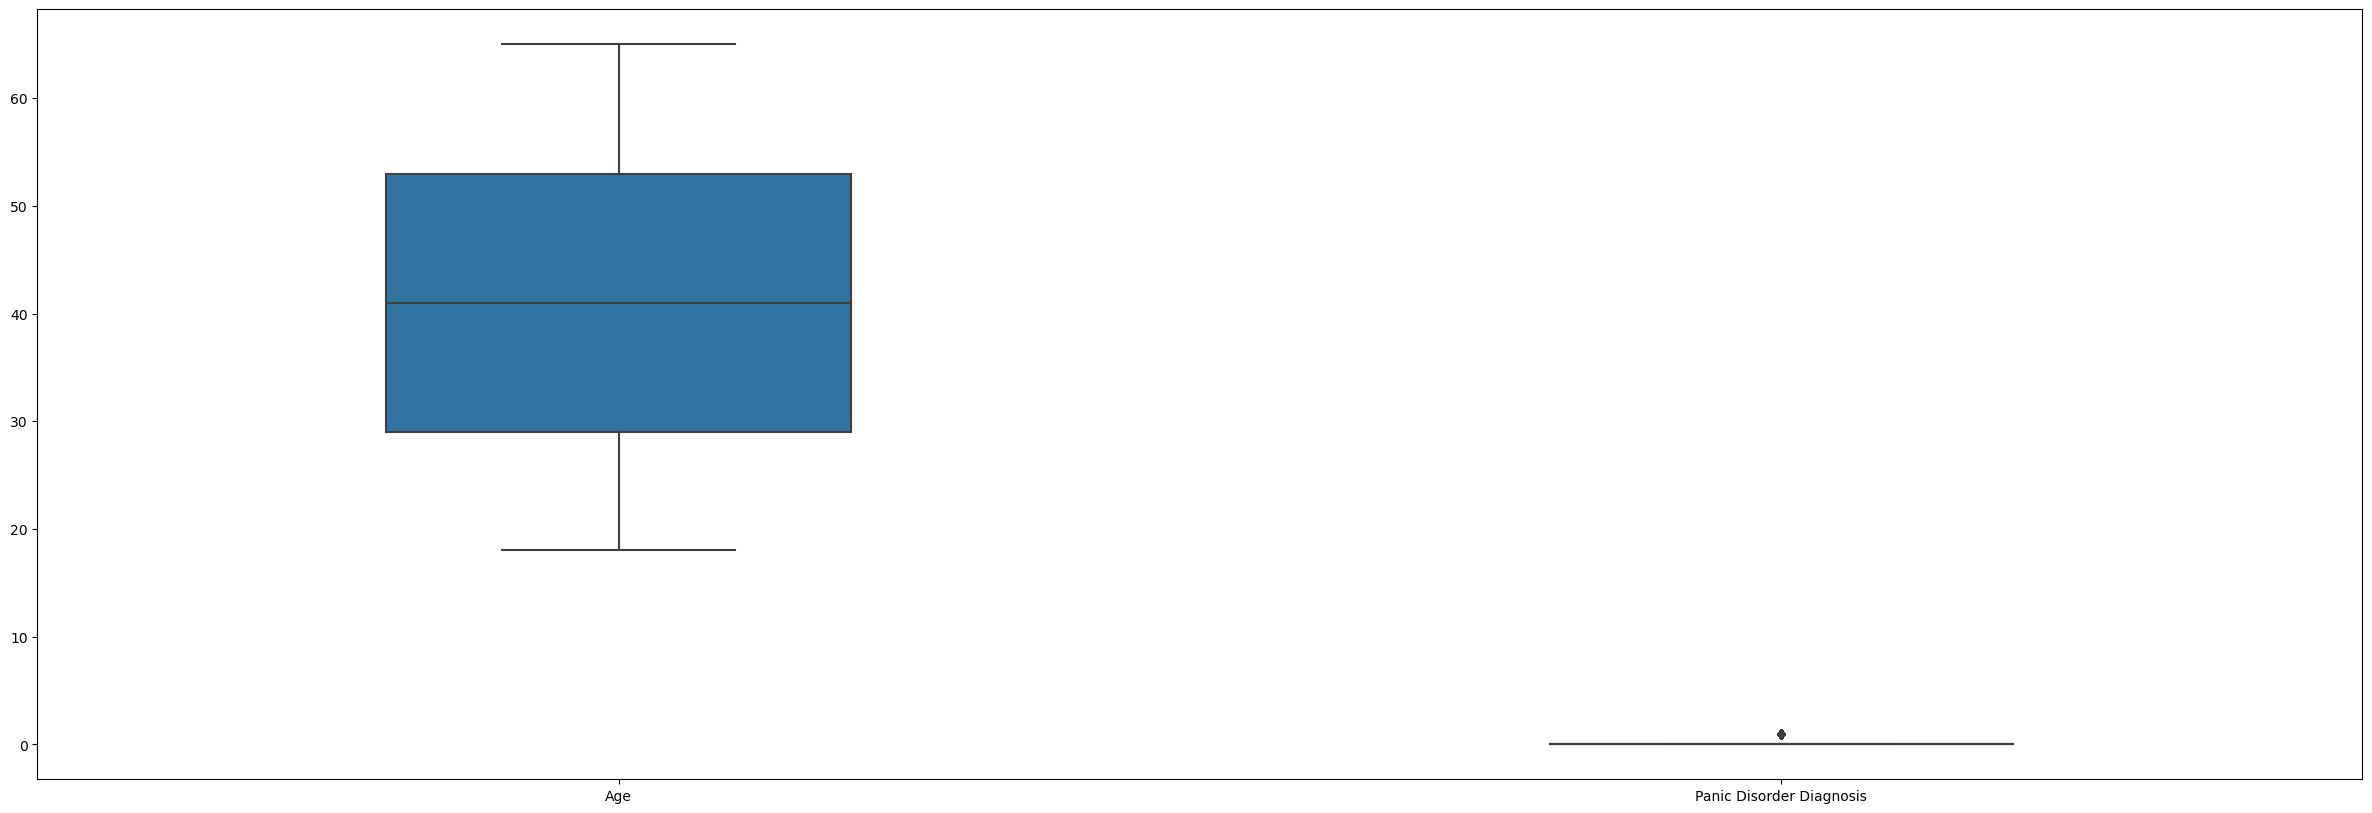

In [12]:
# Store quantitative variables
df_quant=df.select_dtypes(include=[np.number])

# Create seaborn boxplots of quantitative variables
plt.subplots(figsize=(30, 10))
sns.boxplot(data=df_quant, width=0.4)

In [13]:
#Summary statistics of categorical variables
df['Gender'].value_counts(normalize=True)

Gender
Male      0.500013
Female    0.499987
Name: proportion, dtype: float64

In [14]:
df['Current Stressors'].value_counts(normalize=True)

Current Stressors
Low         0.334329
High        0.333027
Moderate    0.332643
Name: proportion, dtype: float64

In [15]:
df['Symptoms'].value_counts(normalize=True)

Symptoms
Dizziness                 0.201481
Fear of losing control    0.201347
Chest pain                0.199803
Shortness of breath       0.199327
Panic attacks             0.198042
Name: proportion, dtype: float64

In [16]:
df['Severity'].value_counts(normalize=True)

Severity
Severe      0.334112
Mild        0.333912
Moderate    0.331976
Name: proportion, dtype: float64

In [17]:
df['Impact on Life'].value_counts(normalize=True)

Impact on Life
Significant    0.334154
Moderate       0.333228
Mild           0.332618
Name: proportion, dtype: float64

In [18]:
df['Demographics'].value_counts(normalize=True)

Demographics
Rural    0.500054
Urban    0.499946
Name: proportion, dtype: float64

In [19]:
df['Medical History'].value_counts(normalize=True)

Medical History
None             0.251400
Diabetes         0.250515
Heart disease    0.250048
Asthma           0.248037
Name: proportion, dtype: float64

In [20]:
df['Psychiatric History'].value_counts(normalize=True)

Psychiatric History
Bipolar disorder       0.250457
Depressive disorder    0.250298
Anxiety disorder       0.250040
None                   0.249205
Name: proportion, dtype: float64

In [21]:
df['Substance Use'].value_counts(normalize=True)

Substance Use
Alcohol    0.334354
None       0.333261
Drugs      0.332385
Name: proportion, dtype: float64

In [22]:
df['Coping Mechanisms'].value_counts(normalize=True)

Coping Mechanisms
Socializing        0.252869
Meditation         0.250565
Seeking therapy    0.249138
Exercise           0.247427
Name: proportion, dtype: float64

In [23]:
df['Social Support'].value_counts(normalize=True)

Social Support
High        0.334363
Moderate    0.333336
Low         0.332301
Name: proportion, dtype: float64

In [24]:
df['Lifestyle Factors'].value_counts(normalize=True)

Lifestyle Factors
Exercise         0.335439
Diet             0.332618
Sleep quality    0.331942
Name: proportion, dtype: float64

In [25]:
#Summary statistics of target variable
df['Panic Disorder Diagnosis'].value_counts(normalize=True)

Panic Disorder Diagnosis
0    0.957267
1    0.042733
Name: proportion, dtype: float64

In [26]:
df['Panic Disorder Diagnosis'].value_counts()

Panic Disorder Diagnosis
0    114693
1      5120
Name: count, dtype: int64

### D. Data Analysis
To analyze the data, I created univariate visualizations of each variable by plotting histograms for each. I also created bivariate visualizations of the predictor variables with the target variable (Panic Disorder Diagnosis). For the quantitative predictor variable (Age), I plotted a scatterplot. Since Panic Disorder Diagnosis is a binary variable, I chose to create crosstabs of the categorical predictor variables with the target variable. 

One advantage to visualizing the relationships between variables is that it allows me to see if those with panic disorder fall more into certain groups within the data. The analyses showed that those with a positive panic disorder diagnosis were more likely to have: high current stressors, panic attacks as a symptom, a severity rating of 'Severe', a signficant impact on life, low social support, and sleep quality as a lifestyle factor. Those with a positive panic disorder diagnosis were also less likely to use exercise as a coping mechanism.

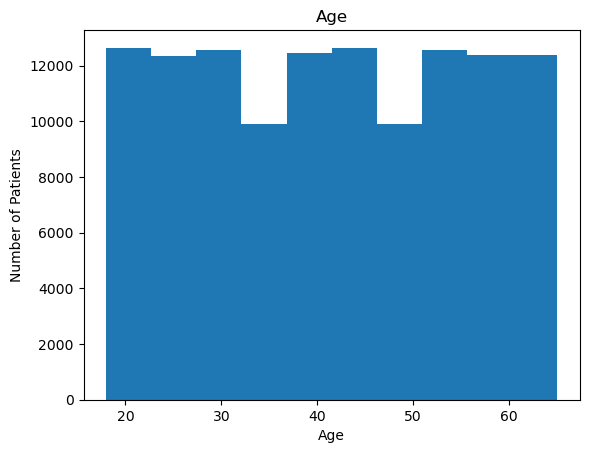

In [27]:
#Univariate Statistics- Age
plt.hist(df.Age)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

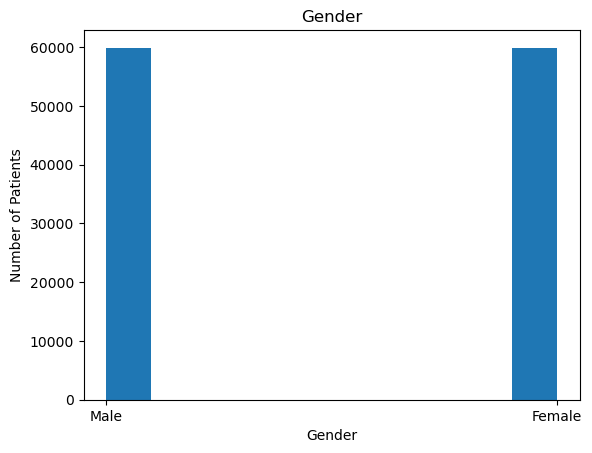

In [28]:
#Univariate Statistics- Gender
plt.hist(df.Gender)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

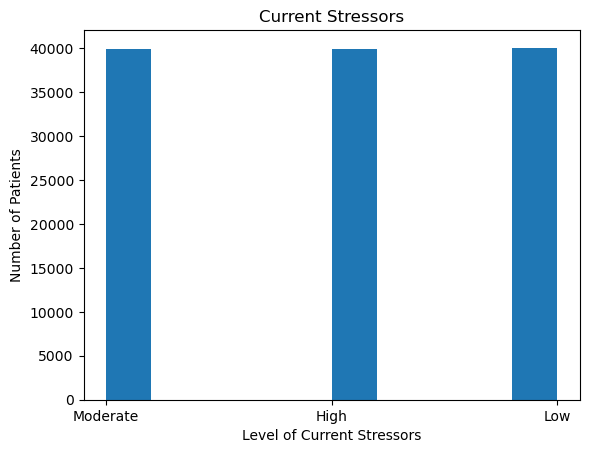

In [29]:
#Univariate Statistics- Current Stressors
plt.hist(df['Current Stressors'])
plt.title('Current Stressors')
plt.xlabel('Level of Current Stressors')
plt.ylabel('Number of Patients')
plt.show()

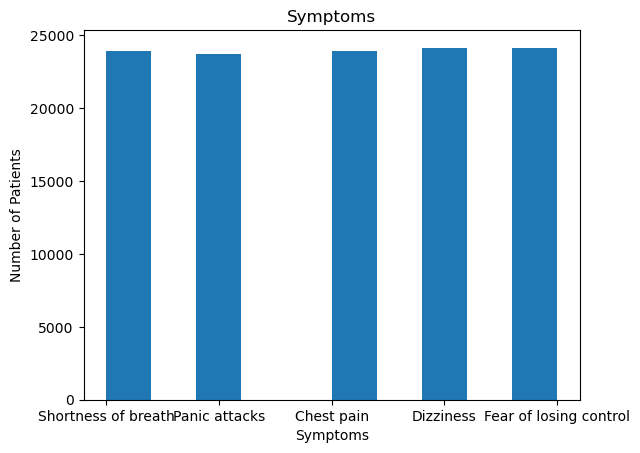

In [30]:
#Univariate Statistics- Symptoms
plt.hist(df['Symptoms'])
plt.title('Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Number of Patients')
plt.show()

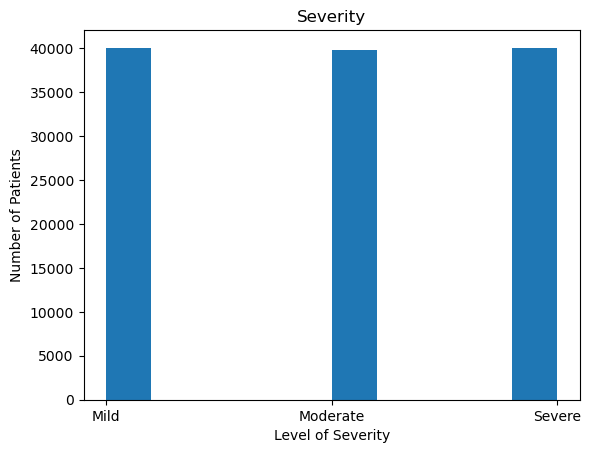

In [31]:
#Univariate Statistics- Severity
plt.hist(df['Severity'])
plt.title('Severity')
plt.xlabel('Level of Severity')
plt.ylabel('Number of Patients')
plt.show()

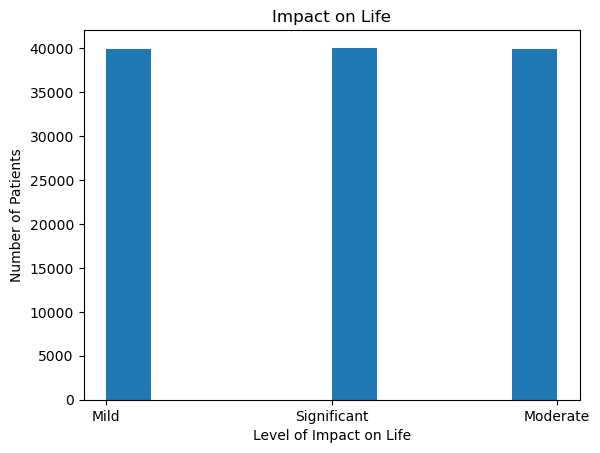

In [32]:
#Univariate Statistics- Impact on Life
plt.hist(df['Impact on Life'])
plt.title('Impact on Life')
plt.xlabel('Level of Impact on Life')
plt.ylabel('Number of Patients')
plt.show()

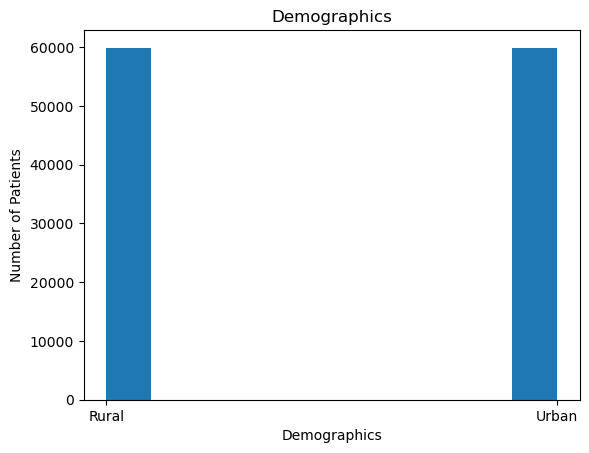

In [33]:
#Univariate Statistics- Demographics
plt.hist(df['Demographics'])
plt.title('Demographics')
plt.xlabel('Demographics')
plt.ylabel('Number of Patients')
plt.show()

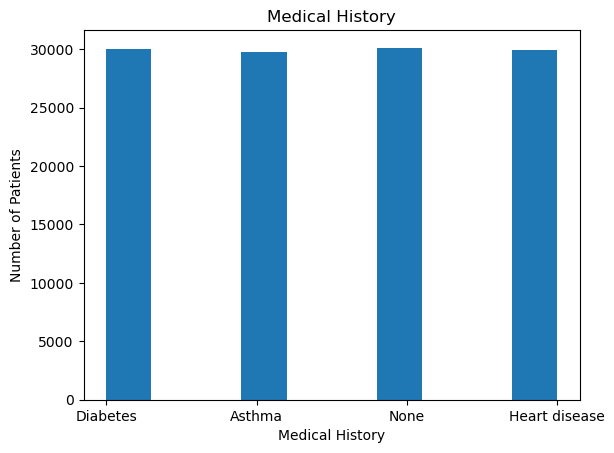

In [34]:
#Univariate Statistics- Medical History
plt.hist(df['Medical History'])
plt.title('Medical History')
plt.xlabel('Medical History')
plt.ylabel('Number of Patients')
plt.show()

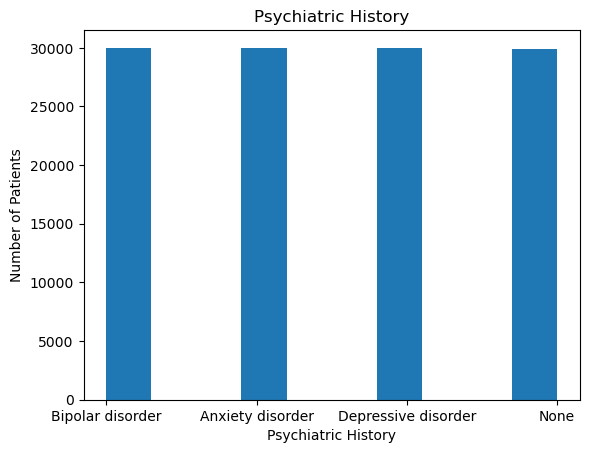

In [35]:
#Univariate Statistics- Psychiatric History
plt.hist(df['Psychiatric History'])
plt.title('Psychiatric History')
plt.xlabel('Psychiatric History')
plt.ylabel('Number of Patients')
plt.show()

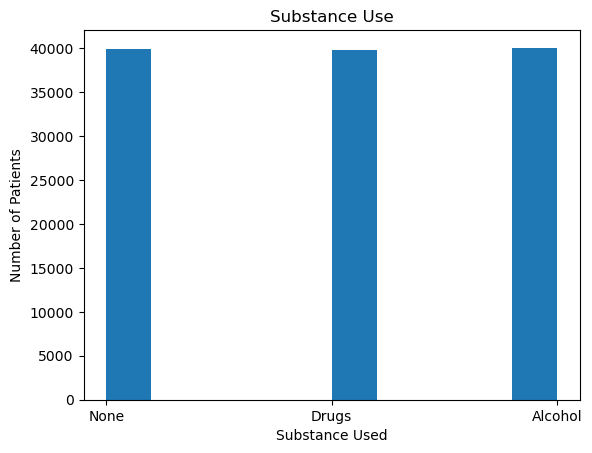

In [36]:
#Univariate Statistics- Substance Use
plt.hist(df['Substance Use'])
plt.title('Substance Use')
plt.xlabel('Substance Used')
plt.ylabel('Number of Patients')
plt.show()

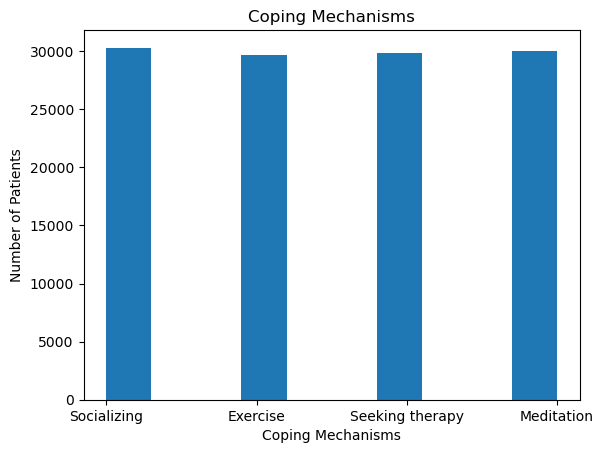

In [37]:
#Univariate Statistics- Coping Mechanisms
plt.hist(df['Coping Mechanisms'])
plt.title('Coping Mechanisms')
plt.xlabel('Coping Mechanisms')
plt.ylabel('Number of Patients')
plt.show()

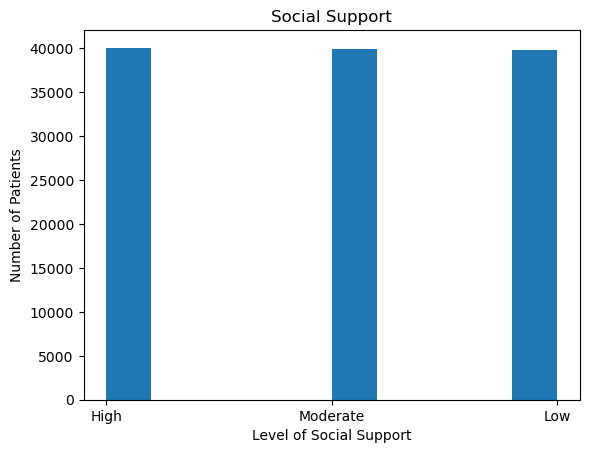

In [38]:
#Univariate Statistics- Social Support
plt.hist(df['Social Support'])
plt.title('Social Support')
plt.xlabel('Level of Social Support')
plt.ylabel('Number of Patients')
plt.show()

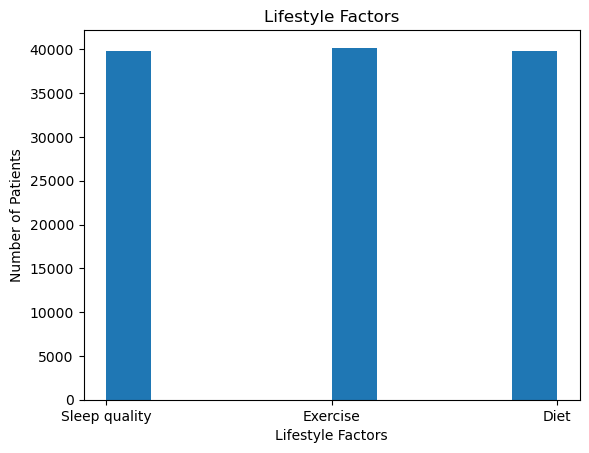

In [39]:
#Univariate Statistics- Lifestyle Factors
plt.hist(df['Lifestyle Factors'])
plt.title('Lifestyle Factors')
plt.xlabel('Lifestyle Factors')
plt.ylabel('Number of Patients')
plt.show()

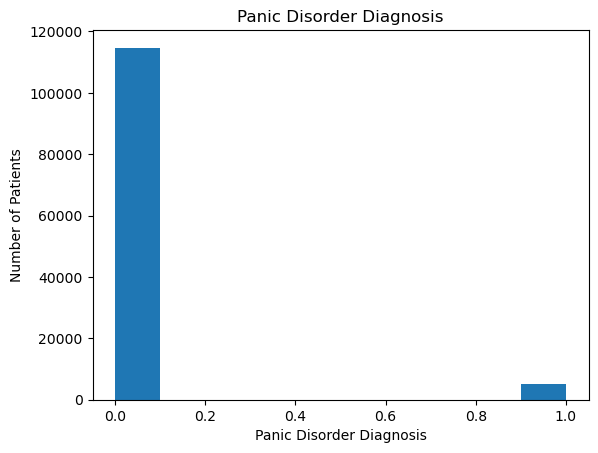

In [40]:
#Univariate Statistics- Panic Disorder Diagnosis
plt.hist(df['Panic Disorder Diagnosis'])
plt.title('Panic Disorder Diagnosis')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Number of Patients')
plt.show()

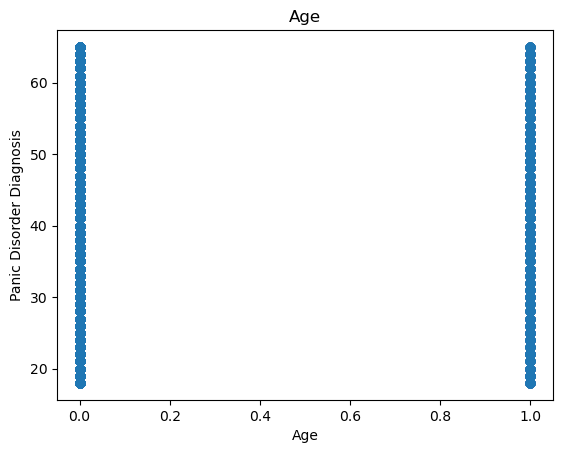

In [41]:
#Bivariate Statistics- Panic Disorder Diagnosis x Age
plt.scatter(df['Panic Disorder Diagnosis'], df.Age)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Panic Disorder Diagnosis')
plt.show()

In [42]:
#Bivariate Statistics- Panic Disorder Diagnosis x Gender
gender_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Gender'])
print(gender_ct)

Gender                    Female   Male
Panic Disorder Diagnosis               
0                          57351  57342
1                           2554   2566


In [43]:
#Bivariate Statistics- Panic Disorder Diagnosis x Current Stressors
stressors_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Current Stressors'])
print(stressors_ct)

Current Stressors          High    Low  Moderate
Panic Disorder Diagnosis                        
0                         36201  39337     39155
1                          3700    720       700


In [44]:
#Bivariate Statistics- Panic Disorder Diagnosis x Symptoms
symp_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Symptoms'])
print(symp_ct)

Symptoms                  Chest pain  Dizziness  Fear of losing control  \
Panic Disorder Diagnosis                                                  
0                              23191      23417                   23363   
1                                748        723                     761   

Symptoms                  Panic attacks  Shortness of breath  
Panic Disorder Diagnosis                                      
0                                 21571                23151  
1                                  2157                  731  


In [45]:
#Bivariate Statistics- Panic Disorder Diagnosis x Severity
sev_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Severity'])
print(sev_ct)

Severity                   Mild  Moderate  Severe
Panic Disorder Diagnosis                         
0                         38931     38722   37040
1                          1076      1053    2991


In [46]:
#Bivariate Statistics- Panic Disorder Diagnosis x Impact on Life
imp_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Impact on Life'])
print(imp_ct)

Impact on Life             Mild  Moderate  Significant
Panic Disorder Diagnosis                              
0                         38902     38922        36869
1                           950      1003         3167


In [47]:
#Bivariate Statistics- Panic Disorder Diagnosis x Demographics
demo_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Demographics'])
print(demo_ct)

Demographics              Rural  Urban
Panic Disorder Diagnosis              
0                         56962  57731
1                          2951   2169


In [48]:
#Bivariate Statistics- Panic Disorder Diagnosis x Medical History
med_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Medical History'])
print(med_ct)

Medical History           Asthma  Diabetes  Heart disease   None
Panic Disorder Diagnosis                                        
0                          28288     28514          28495  29396
1                           1430      1501           1464    725


In [49]:
#Bivariate Statistics- Panic Disorder Diagnosis x Psychiatric History
psych_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Psychiatric History'])
print(psych_ct)

Psychiatric History       Anxiety disorder  Bipolar disorder  \
Panic Disorder Diagnosis                                       
0                                    28489             28622   
1                                     1469              1386   

Psychiatric History       Depressive disorder   None  
Panic Disorder Diagnosis                              
0                                       28647  28935  
1                                        1342    923  


In [50]:
#Bivariate Statistics- Panic Disorder Diagnosis x Substance Use
sub_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Substance Use'])
print(sub_ct)

Substance Use             Alcohol  Drugs   None
Panic Disorder Diagnosis                       
0                           38208  37955  38530
1                            1852   1869   1399


In [51]:
#Bivariate Statistics- Panic Disorder Diagnosis x Coping Mechanisms
cope_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Coping Mechanisms'])
print(cope_ct)

Coping Mechanisms         Exercise  Meditation  Seeking therapy  Socializing
Panic Disorder Diagnosis                                                    
0                            29133       28528            28275        28757
1                              512        1493             1575         1540


In [52]:
#Bivariate Statistics- Panic Disorder Diagnosis x Social Support
supp_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Social Support'])
print(supp_ct)

Social Support             High    Low  Moderate
Panic Disorder Diagnosis                        
0                         38546  37788     38359
1                          1515   2026      1579


In [53]:
#Bivariate Statistics- Panic Disorder Diagnosis x Lifestyle Factors
life_ct = pd.crosstab(df['Panic Disorder Diagnosis'], df['Lifestyle Factors'])
print(life_ct)

Lifestyle Factors          Diet  Exercise  Sleep quality
Panic Disorder Diagnosis                                
0                         39852     40190          34651
1                             0         0           5120


I continued preparing the data by encoding the ordinal categorical variables, or variables with a natural rank order, with numeric values. Since the Demographics variable reflects population density (Rural/Urban), I chose to classify it as an ordinal variable. One advantage to this encoding technique is that doesn't require adding additional variables to my model, which will keep the model running quicker with less variables.

I then performed one-hot encoding for the categorical variables without natural ordering and converted the variables to integers. The final encoded data set included 119,813 rows and 32 columns. I saved the cleaned data set to a CSV file.

In [54]:
# Encode ordinal categorical variables as numeric
df['Current Stressors'].replace(('Low', 'Moderate', 'High'), (1, 2, 3), inplace=True)
df['Severity'].replace(('Mild', 'Moderate', 'Severe'), (1, 2, 3), inplace=True)
df['Impact on Life'].replace(('Mild', 'Moderate', 'Significant'), (1, 2, 3), inplace=True)
df['Demographics'].replace(('Rural', 'Urban'), (1, 2), inplace=True)
df['Social Support'].replace(('Low', 'Moderate', 'High'), (1, 2, 3), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119813 entries, 0 to 119999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Age                       119813 non-null  int64 
 1   Gender                    119813 non-null  object
 2   Current Stressors         119813 non-null  int64 
 3   Symptoms                  119813 non-null  object
 4   Severity                  119813 non-null  int64 
 5   Impact on Life            119813 non-null  int64 
 6   Demographics              119813 non-null  int64 
 7   Medical History           119813 non-null  object
 8   Psychiatric History       119813 non-null  object
 9   Substance Use             119813 non-null  object
 10  Coping Mechanisms         119813 non-null  object
 11  Social Support            119813 non-null  int64 
 12  Lifestyle Factors         119813 non-null  object
 13  Panic Disorder Diagnosis  119813 non-null  int64 
dtypes: int64(

In [55]:
#One-hot encode cateegorical variables with no natural rank ordering, convert to integers
multi_col = ['Gender', 'Symptoms', 'Medical History', 'Psychiatric History', 'Substance Use', 'Coping Mechanisms', 'Lifestyle Factors']

df_encoded = pd.get_dummies(df, columns=multi_col, drop_first=False)
one_hot_col = [col for col in df_encoded.columns if any (prefix in col for prefix in multi_col)]
for col in one_hot_col:
    df_encoded[col] = df_encoded[col].astype(int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119813 entries, 0 to 119999
Data columns (total 32 columns):
 #   Column                                   Non-Null Count   Dtype
---  ------                                   --------------   -----
 0   Age                                      119813 non-null  int64
 1   Current Stressors                        119813 non-null  int64
 2   Severity                                 119813 non-null  int64
 3   Impact on Life                           119813 non-null  int64
 4   Demographics                             119813 non-null  int64
 5   Social Support                           119813 non-null  int64
 6   Panic Disorder Diagnosis                 119813 non-null  int64
 7   Gender_Female                            119813 non-null  int32
 8   Gender_Male                              119813 non-null  int32
 9   Symptoms_Chest pain                      119813 non-null  int32
 10  Symptoms_Dizziness                       119813 non-null  int

In [56]:
df_encoded.shape

(119813, 32)

In [57]:
#Save cleaned data set to csv file
df_encoded.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D214_T2_MV_clean.csv')

I created a seaborn heatmap to identify correlation between variables. Aside from the expected correlation between the one-hot encoded variables, there was low correlation identified. One disadvantage to the heatmap technique used is that it doesn't include the correlation values in the visual, only the heat color of the correlation. This made it slightly trickier to interpret the heatmap.

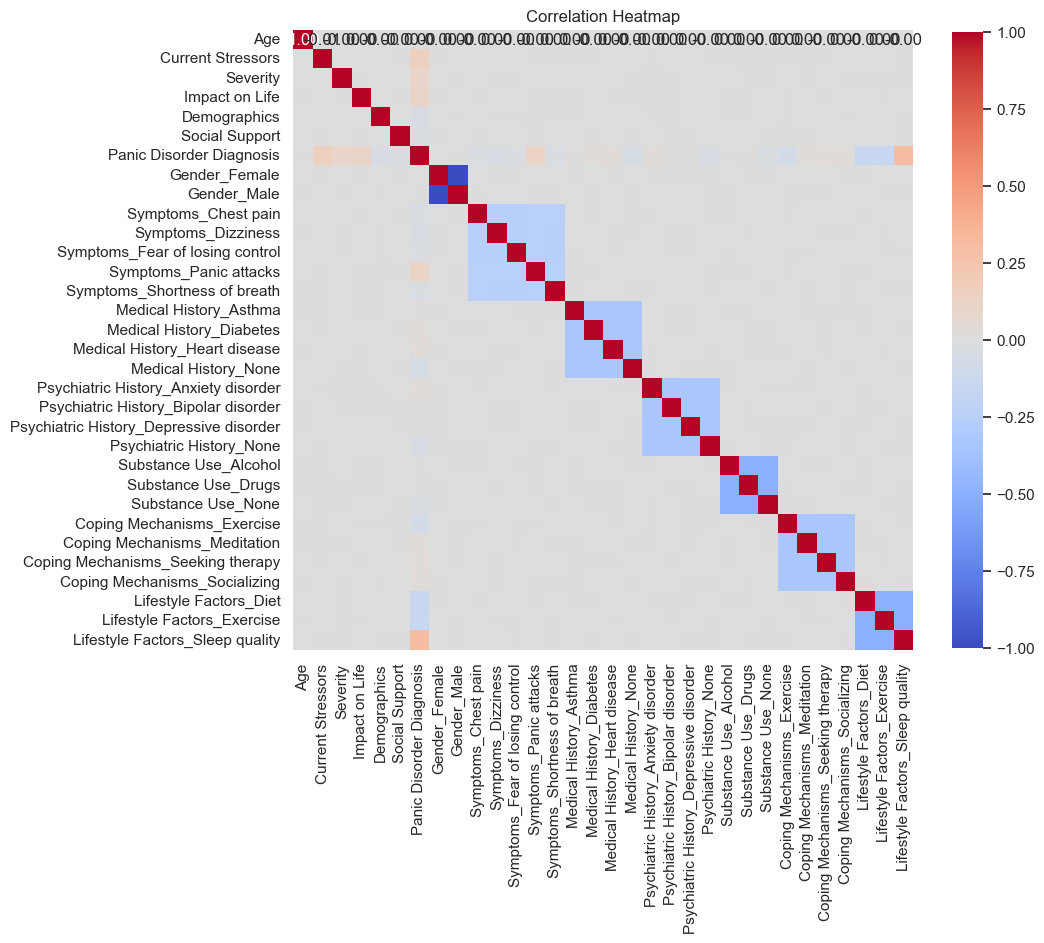

In [65]:
#Assess correlation with heat map
corr_matrix = df_encoded.corr()

sns.set(style='white')
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')
plt.show()

Next I split the data 80/20 into training and testing sets. I saved the split data sets to CSV files.

In [59]:
#Split data into training and testing sets
X = df_encoded.iloc[:,:-1]
y = df_encoded['Panic Disorder Diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(95850, 31)
(23963, 31)
(95850,)
(23963,)


In [60]:
#Save split data sets to csv file
x_train.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D214_T2_MV_x_train.csv')
x_test.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D214_T2_MV_x_test.csv')
y_train.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D214_T2_MV_y_train.csv')
y_test.to_csv('C:/Users/12034/OneDrive/Documents/WGU/D214_T2_MV_y_test.csv')

I began to build my random forest model by first specifying the hyperparameters for the parameter grid for cross-validation. Then I used the RandomizedSearchCV function to evaluate multiple random combinations of hyperparameters and select those that yielded the best cross-validated score. I fit the best model to my training set and printed the parameters of the best model. I then used the model to make predictions on the testing set. I evaluated the model by calculating the accuracy, mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and r-squared value.

In [61]:
#Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

#Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=16,  # Number of random combinations to try
                                   cv=5,       # Cross-validation folds
                                   scoring='accuracy',
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=16, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [62]:
#Get the best model and parameters
print(f"Best Parameters: {random_search.best_params_}")
best_model = random_search.best_estimator_

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [63]:
#Predict on the test set
y_pred = best_model.predict(x_test)

#Model evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Mean Squared Error: {MSE(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(MSE(y_test, y_pred))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R-Squared Value: {r2_score(y_test, y_pred)}')

Accuracy: 1.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-Squared Value: 1.0


### E. Data Summary and Implications
According to the evaluation metric calculations utilized in this study, the accuracy score was 1.0, the MSE was 0.0, the RMSE was 0.0, the MAE was 0.0, and the r-squared value was 1.0. This implies that the model has perfectly predicted all samples in the testing set. Since the MSE was under 0.25 threshold, I reject the null hypothesis.

One limitation of this analysis was that there was no available data dictionary with column descriptions. Due to this lack of clarity, several variables had to be dropped. A perfect accuracy score can sometimes be caused by overfitting of the model. This occurs when the model has memorized the training data. One recommended course of action would be to investigate the model's hyperparameters further and use cross-validation to check the consistency across different subsets of the data and verify the model's generalization ability. Another recommended course of action would be to move forward with implementation of the model and pilot the program with a mental health provider, given its perfect accuracy score. This would allow patients predicted by the model to have a panic disorder diagnosis to receive their diagnosis sooner and be prescribed an appropriate treatment plan.

### F. Sources
Azeem, M. (2023). Panic disorder detection dataset. Kaggle.com. Retrieved January 2, 2025 from https://www.kaggle.com/datasets/muhammadshahidazeem/panic-disorder-detection-dataset/data 

Georgieva, I., Lepping, P., Bozev, V., Lickiewicz, J., Pekara, J., Wikman, S., Loseviča, M., Raveesh, B. N., Mihai, A., & Lantta, T. (2021). Prevalence, new incidence, course, and risk factors of PTSD, depression, anxiety, and panic disorder during the Covid-19 pandemic in 11 countries. Healthcare, 9(6), 664. https://doi.org/10.3390/healthcare9060664

Jothi, N., Husain, W., Rashid, N., Xin, L. (2018). Predicting generalised anxiety disorder among women using decision tree-based classification. International Journal of Business Information Systems, 29(1), 75. https://doi.org/10.1504/IJBIS.2018.093998

Oussi, A., Hamid, K., Bouvet, C. (2023). Managing emotions in panic disorder: A systematic review of studies related to emotional intelligence, alexithymia, emotion regulation, and coping. Journal of Behavior Therapy and Experimental Psychiatry, 79. https://doi.org/10.1016/j.jbtep.2023.101835.

Raschka, S., Patterson, J., & Nolet, C. (2020). Machine learning in Python: Main developments and technology trends in data science, machine learning, and artificial intelligence. Information, 11(4), 193. https://doi.org/10.3390/info11040193

Shafi, A. (2024). Random forest classification with scikit-learn. DataCamp.com. Retrieved January 2, 2025 from https://www.datacamp.com/tutorial/random-forests-classifier-python 

U.S. Food & Drug Administration. (2015). FDA.gov. Retrieved January 2, 2025 from https://www.fda.gov/inspections-compliance-enforcement-and-criminal-investigations/fda-bioresearch-monitoring-information/definitions#:~:text=Good%20Laboratory%20Practice%20(GLP)%20is,%2C%20recorded%2C%20archived%20and%20reported
